# Library

In [1]:
#import necessary libraries
import os
import copy
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torchvision
from torchvision import models
from sklearn.utils import shuffle
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager
from collections import OrderedDict
from pathlib import Path

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

import os
print(os.getcwd())

/kaggle/working


# File DataFrame Creation

In [ ]:
#Image path
image_dir = Path('../input/food41/images')
filepaths = list(image_dir.glob(r"**/*.jpg"))
os.path.split(os.path.split(filepaths[0])[0])

In [ ]:
#Image Labeling
labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1], filepaths))
filepaths = pd.Series(filepaths, name="FilePath")
labels = pd.Series(labels, name="Label") 

In [ ]:
images = pd.concat([filepaths, labels], axis=1)
category_sample = []
for category in images['Label'].unique():
    category_slice = images.query("Label == @category")
    category_sample.append(category_slice.sample(100, random_state = 1))
image_df = pd.concat(category_sample, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [ ]:
image_df

In [ ]:
# Remove duplicate labels
unique_labels_df = image_df.drop_duplicates(subset=['Label'])

# Save the DataFrame to an Excel file
unique_labels_df.to_excel('output.xlsx', index=False)

In [ ]:
image_df['Label'].value_counts()

In [ ]:
calories_data = {
    "greek_salad": [150, 627.6],
    "pancakes": [350, 1464.4],
    "beef_carpaccio": [240, 1004.16],
    "french_fries": [365, 1527.16],
    "bread_pudding": [280, 1171.52],
    "gyoza": [80, 334.72],
    "tiramisu": [450, 1882.8],
    "chicken_curry": [400, 1673.6],
    "scallops": [150, 627.6],
    "frozen_yogurt": [200, 836.8],
    "prime_rib": [450, 1882.8],
    "carrot_cake": [350, 1464.4],
    "beef_tartare": [200, 836.8],
    "nachos": [300, 1255.2],
    "cannoli": [330, 1380.72],
    "cup_cakes": [300, 1255.2],
    "caprese_salad": [250, 1046],
    "macaroni_and_cheese": [300, 1255.2],
    "red_velvet_cake": [350, 1464.4],
    "pork_chop": [400, 1673.6],
    "hummus": [100, 418.4],
    "tuna_tartare": [150, 627.6],
    "sashimi": [100, 418.4],
    "baby_back_ribs": [400, 1673.6],
    "hamburger": [250, 1046],
    "cheese_plate": [300, 1255.2],
    "ravioli": [200, 836.8],
    "foie_gras": [300, 1255.2],
    "fried_rice": [300, 1255.2],
    "crab_cakes": [200, 836.8],
    "chicken_wings": [400, 1673.6],
    "escargots": [180, 753.12],
    "creme_brulee": [350, 1464.4],
    "spring_rolls": [100, 418.4],
    "ice_cream": [200, 836.8],
    "sushi": [250, 1046],
    "pho": [350, 1464.4],
    "guacamole": [200, 836.8],
    "lobster_bisque": [250, 1046],
    "edamame": [120, 502.08],
    "grilled_salmon": [400, 1673.6],
    "churros": [300, 1255.2],
    "falafel": [50, 209.2],
    "onion_rings": [250, 1046],
    "cheesecake": [350, 1464.4],
    "ceviche": [200, 836.8],
    "filet_mignon": [500, 2092],
    "eggs_benedict": [450, 1882.8],
    "hot_and_sour_soup": [100, 418.4],
    "bruschetta": [100, 418.4],
    "lobster_roll_sandwich": [300, 1255.2],
    "omelette": [250, 1046],
    "hot_dog": [150, 627.6],
    "chocolate_mousse": [300, 1255.2],
    "lasagna": [400, 1673.6],
    "waffles": [350, 1464.4],
    "gnocchi": [220, 920.48],
    "panna_cotta": [110, 460.24],
    "steak": [500, 2092],
    "garlic_bread": [200, 836.8],
    "fish_and_chips": [800, 3347.2],
    "samosa": [150, 627.6],
    "mussels": [150, 627.6],
    "ramen": [400, 1673.6],
    "huevos_rancheros": [350, 1464.4],
    "bibimbap": [500, 2092],
    "baklava": [300, 1255.2],
    "poutine": [600, 2510.4],
    "spaghetti_carbonara": [400, 1673.6],
    "strawberry_shortcake": [300, 1255.2],
    "apple_pie": [300, 1255.2],
    "club_sandwich": [600, 2510.4],
    "clam_chowder": [200, 836.8],
    "tacos": [200, 836.8],
    "french_toast": [300, 1255.2],
    "grilled_cheese_sandwich": [300, 1255.2],
    "croque_madame": [500, 2092],
    "pizza": [285, 1192.44],
    "pad_thai": [400, 1673.6],
    "beignets": [200, 836.8],
    "risotto": [300, 1255.2],
    "dumplings": [50, 209.2],
    "peking_duck": [400, 1673.6],
    "caesar_salad": [300, 1255.2],
    "deviled_eggs": [60, 251.04],
    "paella": [400, 1673.6],
    "miso_soup": [40, 167.36],
    "french_onion_soup": [150, 627.6],
    "oysters": [50, 209.2],
    "chicken_quesadilla": [300, 1255.2],
    "donuts": [300, 1255.2],
    "shrimp_and_grits": [500, 2092],
    "takoyaki": [120, 502.08],
    "spaghetti_bolognese": [400, 1673.6],
    "breakfast_burrito": [300, 1255.2],
    "fried_calamari": [200, 836.8],
    "seaweed_salad": [100, 418.4],
    "pulled_pork_sandwich": [400, 1673.6],
    "beet_salad": [150, 627.6],
    "chocolate_cake": [350, 1464.4],
    "macarons": [100, 418.4]
}


In [ ]:
# Map the dictionary to your image_df based on the 'Label' column
image_df['Calories_kcal'], image_df['Calories_kJ'] = zip(*image_df['Label'].map(calories_data))

# Display the updated dataframe
image_df.head()


# Import Data

In [3]:
image_df = pd.read_csv('/kaggle/input/foodcalories/sorted_food_images_by_name.csv')
image_df

,FilePath,Label,Calories_kcal,Calories_kJ
0,../input/food41/images/apple_pie/2047916.jpg,apple_pie,300,1255.2
1,../input/food41/images/apple_pie/1819763.jpg,apple_pie,300,1255.2
2,../input/food41/images/apple_pie/1648647.jpg,apple_pie,300,1255.2
3,../input/food41/images/apple_pie/750073.jpg,apple_pie,300,1255.2
4,../input/food41/images/apple_pie/2708417.jpg,apple_pie,300,1255.2
...,...,...,...,...
10095,../input/food41/images/waffles/2676468.jpg,waffles,350,1464.4
10096,../input/food41/images/waffles/1350003.jpg,waffles,350,1464.4
10097,../input/food41/images/waffles/361476.jpg,waffles,350,1464.4
10098,../input/food41/images/waffles/551528.jpg,waffles,350,1464.4


# Image Visualization

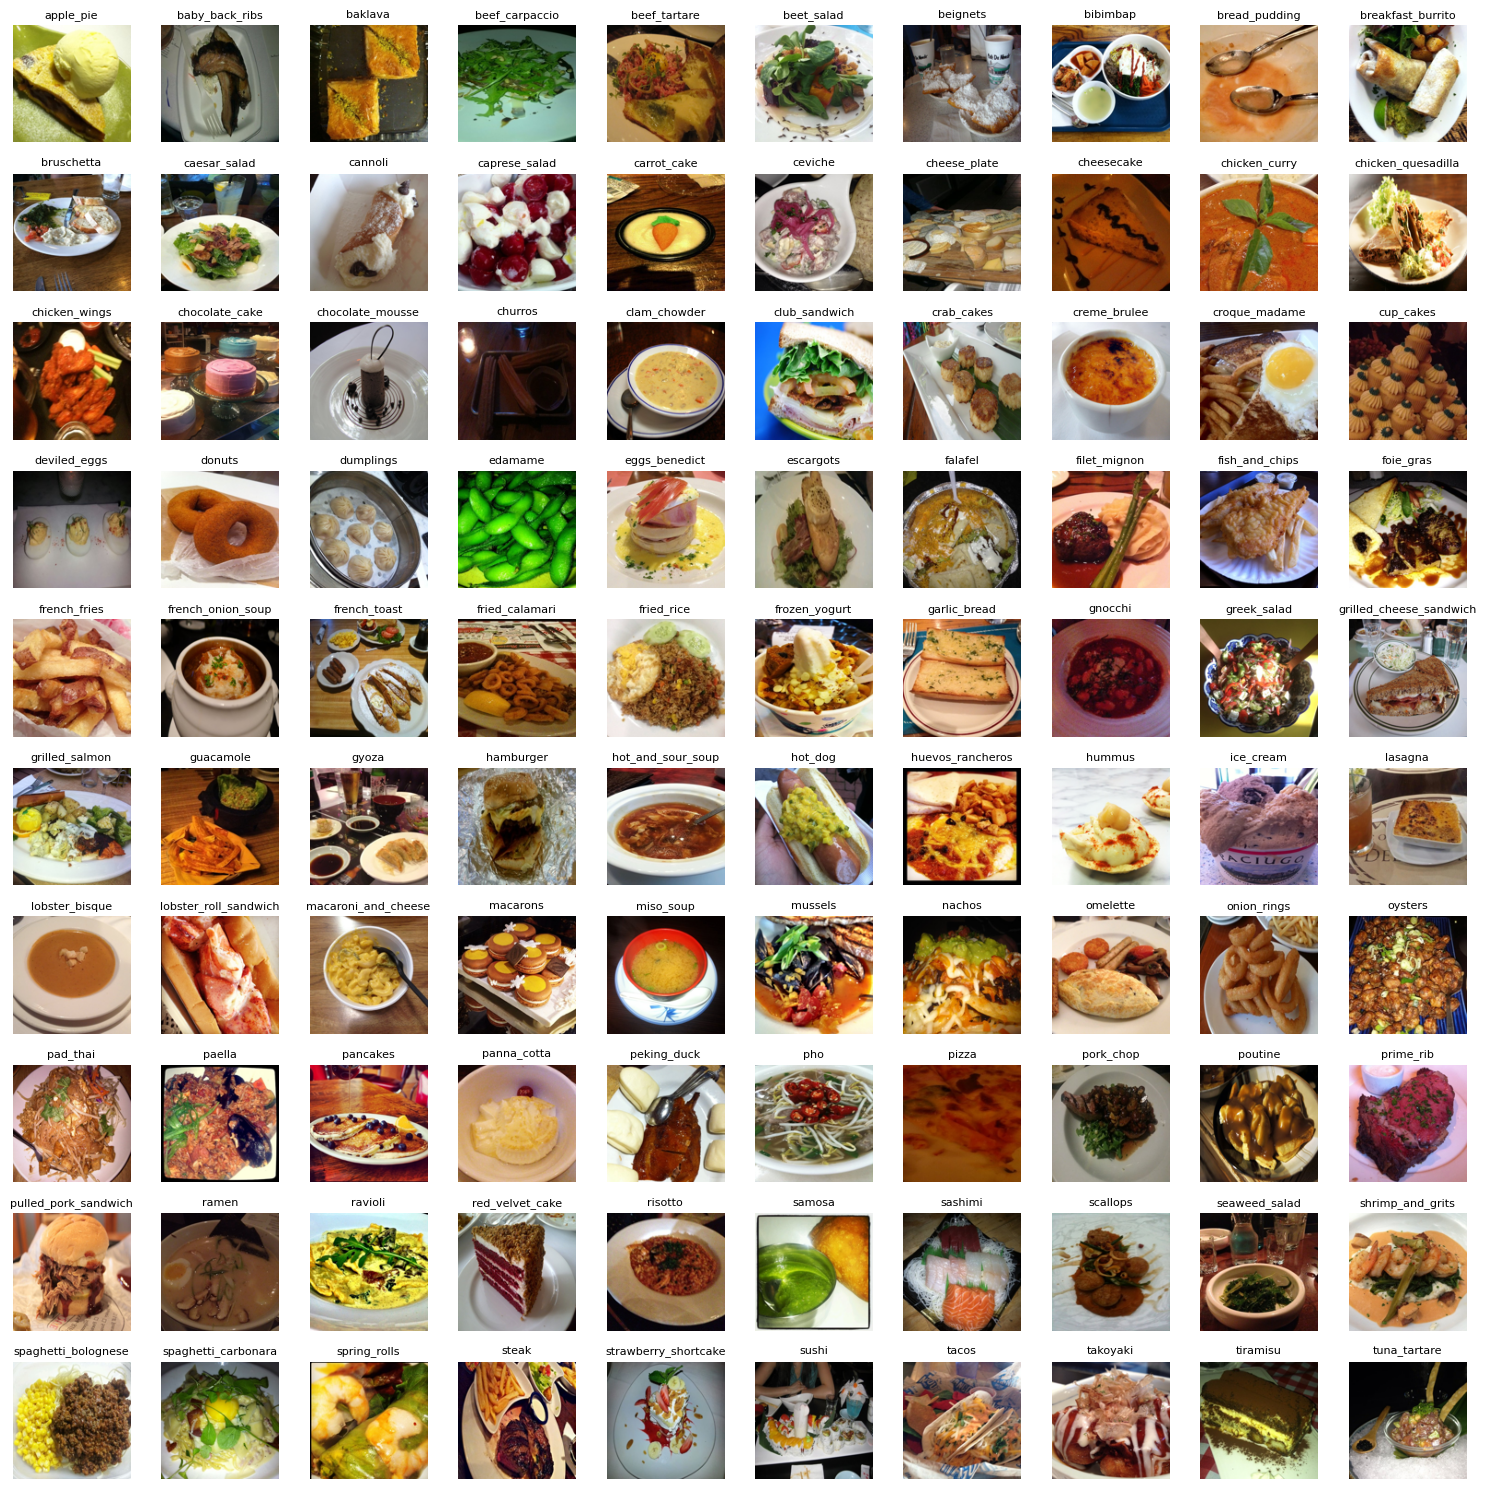

In [4]:
from PIL import Image
# Group by 'Label' and pick the first occurrence for each label
unique_images = image_df.groupby("Label").first().reset_index()

# Plot one image for each label with smaller size
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(15, 15))  # Adjust rows and columns as needed
axes = axes.flatten()

for ax, (_, row) in zip(axes, unique_images.iterrows()):
    img_path = row['FilePath']
    label = row['Label']
    
    # Open the image
    img = Image.open(img_path)
    
    # Display the image on a smaller subplot
    ax.imshow(img.resize((128, 128)))  # Resize image to 128x128 pixels
    ax.set_title(label, fontsize=8)
    ax.axis("off")

# Hide any remaining empty subplots
for ax in axes[len(unique_images):]:
    ax.axis("off")

plt.tight_layout()
plt.show()

# Food Dataset

In [29]:
from torch.utils.data import Dataset
from PIL import Image
from sklearn.preprocessing import LabelEncoder

class Food20(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.encoder = LabelEncoder()  # Initialize label encoder
        self.encoder.fit(dataframe['Label'])  # Fit the encoder on the 'Label' column

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.FilePath.iloc[idx]
        try:
            # Load image
            image = Image.open(img_name)
            if image.mode != 'RGB':
                image = image.convert('RGB')
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")
            return self.__getitem__((idx + 1) % len(self.dataframe))  # Skip the image and try the next one

        # Get the label by transforming it using the encoder
        label = self.encoder.transform([self.dataframe.Label.iloc[idx]])[0]

        # Apply the transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, label


# Data Augmentations

In [30]:
import torchvision.transforms as transforms
import torchvision

# Data augmentation for training
train_transforms = transforms.Compose([
    transforms.RandomRotation(30),  # Random rotation between -30 and 30 degrees
    transforms.RandomResizedCrop(224),  # Randomly resize and crop the image to 224x224
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    torchvision.transforms.AutoAugment(torchvision.transforms.AutoAugmentPolicy.IMAGENET),  # AutoAugment for ImageNet
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize using ImageNet mean and std
])

# Data augmentation for testing
test_transforms = transforms.Compose([
    transforms.Resize(255),  # Resize the shorter side to 255 while preserving aspect ratio
    transforms.CenterCrop(224),  # Crop a 224x224 region from the center of the image
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize using ImageNet mean and std
])


In [53]:
# Apply transformations to the datasets
train_dataset = Food20(dataframe=train_df, transform=train_transforms)
test_dataset = Food20(dataframe=test_df, transform=test_transforms)

# Access the label encoder
label_encoder = test_dataset.encoder

# Create DataLoader objects for training and testing
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


In [32]:
# Display the shapes of the first 10 images in the training dataset
for i, (images, labels) in enumerate(train_loader):
    if i == 0:  # Access the first batch
        for j in range(10):  # Get the first 10 images in the batch
            print(f"Image {j+1} shape: {images[j].shape}")
    break  # Stop after the first batch


Image 1 shape: torch.Size([3, 224, 224])
Image 2 shape: torch.Size([3, 224, 224])
Image 3 shape: torch.Size([3, 224, 224])
Image 4 shape: torch.Size([3, 224, 224])
Image 5 shape: torch.Size([3, 224, 224])
Image 6 shape: torch.Size([3, 224, 224])
Image 7 shape: torch.Size([3, 224, 224])
Image 8 shape: torch.Size([3, 224, 224])
Image 9 shape: torch.Size([3, 224, 224])
Image 10 shape: torch.Size([3, 224, 224])


# Model

In [33]:
weights = models.DenseNet201_Weights.IMAGENET1K_V1
model = models.densenet201(weights = weights)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:01<00:00, 75.8MB/s]


In [34]:
for param in model.parameters():
    param.requires_grad = False

In [35]:
import requests as reqs

url = "https://github.com/Prakhar998/Food-Classification/raw/master/food_classifier.pt"  
r = reqs.get(url, allow_redirects=True)

open("./food_classifier.pt", "wb").write(r.content)

81841763

In [37]:
checkpoint_path = "./food_classifier.pt"
classifier = nn.Sequential(
    nn.Linear(1920, 1024),
    nn.LeakyReLU(),
    nn.Linear(1024, 101),
)

model.classifier = classifier

In [39]:
model.load_state_dict(torch.load(checkpoint_path, map_location='cpu'), strict=False)

/tmp/ipykernel_23/2149799893.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_location='cpu'), strict=False)


<All keys matched successfully>

In [40]:
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [41]:
#hyper parameters
num_epochs = 10

# loss
loss_fn = nn.CrossEntropyLoss()

# all parameters are being optimized
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=[0.9, 0.999])

model = model.to(device)

# Train

In [43]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  print("--> Training Progress")
  # Loop through data loader data batches
  for batch, (X, y) in enumerate(tqdm(dataloader)):
      # Send data to target device
      images, labels = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(images)

      # 2. Calculate  and accumulate loss
      loss = loss_fn(y_pred, labels)
      train_loss += loss.item()

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

      # Calculate and accumulate accuracy metric across all batches
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      train_acc += (y_pred_class == labels).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [44]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
      print("--> Testing Progress")
      # Loop through DataLoader batches
      for batch, (X, y) in enumerate(tqdm(dataloader)):
          # Send data to target device
          images, labels = X.to(device), y.to(device)

          # 1. Forward pass
          test_pred_logits = model(images)

          # 2. Calculate and accumulate loss
          loss = loss_fn(test_pred_logits, labels)
          test_loss += loss.item()

          # Calculate and accumulate accuracy
          test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)

          test_acc += ((test_pred_labels == labels).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [45]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device):
    # Create empty results dictionary
    history = {
        "train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": [],
        'best train acc': (0, 0),
        "best_model": dict()
    }

    # Loop through training and testing steps for a number of epochs
    for epoch in range(epochs):
        print('Epoch {}/{}'.format(epoch + 1, epochs))
        
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        # Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
            f"\n\n=============================\n"
        )

        # Update results dictionary
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["test_loss"].append(test_loss)
        history["test_acc"].append(test_acc)

        if test_loss < history["test_acc"][len(history["test_acc"]) - 1]:
            history["best_model"] = model.state_dict()

        if test_acc > 0.95:
            break

    # Return the filled results at the end of the epochs
    return model, history

In [46]:
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, num_epochs, device)

Epoch 1/10
--> Training Progress


100%|██████████| 253/253 [02:15<00:00,  1.86it/s]


--> Testing Progress


100%|██████████| 64/64 [00:31<00:00,  2.05it/s]


Epoch: 1 | train_loss: 1.2849 | train_acc: 0.6721 | test_loss: 0.5308 | test_acc: 0.8491


Epoch 2/10
--> Training Progress


100%|██████████| 253/253 [01:39<00:00,  2.54it/s]


--> Testing Progress


100%|██████████| 64/64 [00:22<00:00,  2.87it/s]


Epoch: 2 | train_loss: 1.1891 | train_acc: 0.6931 | test_loss: 0.5249 | test_acc: 0.8560


Epoch 3/10
--> Training Progress


100%|██████████| 253/253 [01:41<00:00,  2.50it/s]


--> Testing Progress


100%|██████████| 64/64 [00:22<00:00,  2.85it/s]


Epoch: 3 | train_loss: 1.1676 | train_acc: 0.6921 | test_loss: 0.5230 | test_acc: 0.8560


Epoch 4/10
--> Training Progress


100%|██████████| 253/253 [01:40<00:00,  2.52it/s]


--> Testing Progress


100%|██████████| 64/64 [00:22<00:00,  2.87it/s]


Epoch: 4 | train_loss: 1.1176 | train_acc: 0.7074 | test_loss: 0.5025 | test_acc: 0.8633


Epoch 5/10
--> Training Progress


100%|██████████| 253/253 [01:40<00:00,  2.51it/s]


--> Testing Progress


100%|██████████| 64/64 [00:21<00:00,  2.92it/s]


Epoch: 5 | train_loss: 1.0651 | train_acc: 0.7171 | test_loss: 0.5133 | test_acc: 0.8530


Epoch 6/10
--> Training Progress


100%|██████████| 253/253 [01:41<00:00,  2.49it/s]


--> Testing Progress


100%|██████████| 64/64 [00:22<00:00,  2.88it/s]


Epoch: 6 | train_loss: 1.0943 | train_acc: 0.7174 | test_loss: 0.5221 | test_acc: 0.8560


Epoch 7/10
--> Training Progress


100%|██████████| 253/253 [01:39<00:00,  2.55it/s]


--> Testing Progress


100%|██████████| 64/64 [00:22<00:00,  2.89it/s]


Epoch: 7 | train_loss: 1.0550 | train_acc: 0.7171 | test_loss: 0.5511 | test_acc: 0.8486


Epoch 8/10
--> Training Progress


100%|██████████| 253/253 [01:40<00:00,  2.53it/s]


--> Testing Progress


100%|██████████| 64/64 [00:22<00:00,  2.88it/s]


Epoch: 8 | train_loss: 1.0386 | train_acc: 0.7250 | test_loss: 0.5544 | test_acc: 0.8398


Epoch 9/10
--> Training Progress


100%|██████████| 253/253 [01:39<00:00,  2.54it/s]


--> Testing Progress


100%|██████████| 64/64 [00:22<00:00,  2.90it/s]


Epoch: 9 | train_loss: 0.9979 | train_acc: 0.7365 | test_loss: 0.6401 | test_acc: 0.8276


Epoch 10/10
--> Training Progress


100%|██████████| 253/253 [01:40<00:00,  2.52it/s]


--> Testing Progress


100%|██████████| 64/64 [00:22<00:00,  2.87it/s]

Epoch: 10 | train_loss: 0.9921 | train_acc: 0.7301 | test_loss: 0.5585 | test_acc: 0.8506




# Evaluation

In [54]:
def evaluate(model, dataloader, label_encoder):
    device = next(model.parameters()).device  # Get the device of the model
    model.eval()
    n_correct = 0
    n_samples = 0
    all_preds = []
    all_labels = []

    for images, labels in tqdm(dataloader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        preds = torch.argmax(torch.softmax(outputs, 1), 1)

        # Converting predictions and labels to numpy arrays
        preds_np = preds.cpu().numpy()
        labels_np = labels.cpu().numpy()

        # Store all predictions and labels for later metrics calculation
        all_preds.extend(preds_np)
        all_labels.extend(labels_np)

        n_samples += labels.size(0)
        n_correct += (preds == labels).sum().item()

    # Calculate accuracy
    acc = 100.0 * n_correct / n_samples

    # Calculate F1 score
    f1 = f1_score(all_labels, all_preds, average='weighted')

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # Get class names from the LabelEncoder
    class_names = label_encoder.classes_

    # Generate classification report with class names
    class_report = classification_report(all_labels, all_preds, target_names=class_names)

    print(f'Accuracy: {acc:.2f}%')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)

    return acc, f1, conf_matrix, class_report


In [55]:
acc, f1, conf_matrix, class_report = evaluate(model, test_loader, label_encoder)

100%|██████████| 16/16 [00:21<00:00,  1.36s/it]

Accuracy: 85.54%
F1 Score: 0.8546
Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 19 ...  1  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 17  0]
 [ 0  0  0 ...  0  0 17]]
Classification Report:
                         precision    recall  f1-score   support

              apple_pie       1.00      0.55      0.71        20
         baby_back_ribs       0.95      0.95      0.95        20
                baklava       0.90      0.95      0.93        20
         beef_carpaccio       0.82      0.70      0.76        20
           beef_tartare       0.85      0.85      0.85        20
             beet_salad       0.86      0.90      0.88        20
               beignets       0.83      1.00      0.91        20
               bibimbap       1.00      0.85      0.92        20
          bread_pudding       0.82      0.90      0.86        20
      breakfast_burrito       0.77      0.85      0.81        20
             bruschetta       0.61      0.95      0.7

# Predict Image

In [56]:
import torch
from PIL import Image

def predict_image(model, image_path, label_encoder, dataframe, transform, device):
    """
    Predict the label and calories of a given image using the trained model.

    Args:
        model: The trained PyTorch model.
        image_path: Path to the image to predict.
        label_encoder: LabelEncoder used during training.
        dataframe: DataFrame containing label and calorie information.
        transform: Transformations applied to the input image.
        device: Device where the model is loaded (e.g., 'cuda' or 'cpu').

    Returns:
        label: Predicted class label.
        calories_kcal: Predicted calories in kcal.
        calories_kJ: Predicted calories in kJ.
    """
    # Preprocess the image
    image = Image.open(image_path)
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Apply the transformations
    input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

    # Set model to evaluation mode and make prediction
    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        predicted_idx = torch.argmax(torch.softmax(output, dim=1), dim=1).item()

    # Map prediction index to label
    label = label_encoder.inverse_transform([predicted_idx])[0]

    # Retrieve calorie information from the DataFrame
    row = dataframe[dataframe['Label'] == label].iloc[0]
    calories_kcal = row['Calories_kcal']
    calories_kJ = row['Calories_kJ']

    return label, calories_kcal, calories_kJ


In [59]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Path to the image you want to predict
image_path = '/kaggle/input/food41/images/crab_cakes/1006485.jpg'

# Make a prediction
label, calories_kcal, calories_kJ = predict_image(
    model=model, 
    image_path=image_path, 
    label_encoder=test_dataset.encoder, 
    dataframe=image_df, 
    transform=test_transforms, 
    device=device
)

# Output the result
print(f'Predicted Label: {label}')
print(f'Calories: {calories_kcal} kcal / {calories_kJ} kJ')
print("\nNote: The calorie information provided is an estimation based on the dataset and may not be accurate for all servings or preparations.")

Predicted Label: crab_cakes
Calories: 200 kcal / 836.8 kJ

Note: The calorie information provided is an estimation based on the dataset and may not be accurate for all servings or preparations.


# Saving the model

In [60]:
# Save the entire model
save_path = "densenet201_food_classifier_full.pth"
torch.save(model, save_path)
print(f"Entire model saved to {save_path}")

Entire model saved to /kaggle/working/densenet201_food_classifier_full.pth


In [61]:
# Save the model weights
save_path = "densenet201_food_classifier.pth"
torch.save(model.state_dict(), save_path)
print(f"Model weights saved to {save_path}")

Model weights saved to densenet201_food_classifier.pth


# Load Model (for future)

In [ ]:
# Recreate the model architecture
model = models.densenet201(weights=models.DenseNet201_Weights.IMAGENET1K_V1)

# Replace the classifier to match your task
classifier = nn.Sequential(
    nn.Linear(1920, 1024),
    nn.LeakyReLU(),
    nn.Linear(1024, 101)
)
model.classifier = classifier

# Load the weights
model.load_state_dict(torch.load("densenet201_food_classifier.pth"))
model.to(device)
print("Model weights loaded successfully!")

In [ ]:
# Load the entire model
model = torch.load("densenet201_food_classifier_full.pth")
model.to(device)
print("Entire model loaded successfully!")